### TIENDA COSMETICA
#### PySpark
Este proyecto tanta de realizar consultas sobre 2GB de datos de una tienda de cosmetica en el que se han realizado una serie de compras por sus clientes desde Diciembre hasta Marzo. Contiene **20.692.840** de datos. Vamos a realizar consultas sobre que productos se han comprando en grandes cantidades en nuestra tienda para poder hacer sugerencias para marketing digital o bussines inteligence.

In [2]:
import findspark
findspark.init()
findspark.find()

'C:\\spark\\spark-2.4.3-bin-hadoop2.7'

In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import asc
from pyspark.sql.functions import *

In [4]:
spark= SparkSession.builder.appName('Ejemplo.com').getOrCreate()

In [5]:
df2 = spark.read.options(header='True', inferSchema='True').csv('C:/Users/USUARIO/Desktop/CursoML/Data/TiendaCosme/*.csv')

In [5]:
df2.count()

20692840

### CONSULTAS

In [6]:
df2.printSchema()

root
 |-- event_time: string (nullable = true)
 |-- event_type: string (nullable = true)
 |-- product_id: integer (nullable = true)
 |-- category_id: long (nullable = true)
 |-- category_code: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- price: double (nullable = true)
 |-- user_id: integer (nullable = true)
 |-- user_session: string (nullable = true)



In [7]:
df2.select(['event_type']).distinct().show()

+----------------+
|      event_type|
+----------------+
|        purchase|
|            view|
|            cart|
|remove_from_cart|
+----------------+



### PREPROCESADO
Sacamos los productos que han sido comprados, 1.287.007

In [6]:
productos = df2.select('product_id').filter("event_type='purchase'")

In [10]:
productos.count()

1287007

In [9]:
productos.show()

+----------+
|product_id|
+----------+
|      4554|
|      4600|
|      4607|
|      4640|
|      4689|
|      4768|
|      4820|
|      4870|
|   5762834|
|   5811642|
|   5843557|
|   5843567|
|   5858911|
|   5887055|
|   5894905|
|   5894906|
|   5894907|
|   5894908|
|   5894910|
|   5894911|
+----------+
only showing top 20 rows



In [16]:
prod = df2.select('product_id').filter("event_type='purchase'").distinct()

In [34]:
sesiones = df2.select(['user_session']).filter("event_type='cart' AND product_id='5761411'")

In [17]:
prod.show()

+----------+
|product_id|
+----------+
|   5815137|
|   5670719|
|   5574996|
|   5900643|
|   5863096|
|   5834157|
|   5823267|
|   5868397|
|   5809871|
|   5814871|
|   5885863|
|     59990|
|   5837927|
|   5695639|
|   5767927|
|   5859171|
|   5563822|
|   5744098|
|   5908237|
|   5890174|
+----------+
only showing top 20 rows



In [20]:
prod.count()

40777

 ### Parte 1
 Agrupamos los productos y contabilizamos cuantas veces han sido comprados. Contabilizamos solamente los que hayan superado las 1800 ventas en estos 4 meses.

In [7]:
grupos = productos.groupBy("product_id").count()

In [8]:
grupos = grupos.select(["product_id", "count"]).filter("count > 1800")

In [53]:
grupos.show()

+----------+-----+
|product_id|count|
+----------+-----+
|   5751383| 2948|
|   5816170| 1802|
|   5751422| 3521|
|   5700037| 3684|
|   5809911| 1827|
|   5809910| 7549|
|   5815662| 3246|
|   5809912| 3307|
|      5304| 3134|
|   5854897| 4631|
|   5792800| 2711|
|   5849033| 2782|
|      5013| 1842|
|   5686925| 2360|
|   5528035| 1847|
|   5802432| 3533|
|   5843836| 1823|
|   5833330| 1829|
+----------+-----+



In [9]:
from pyspark.sql.functions import desc
grupos.sort(desc("count")).show()

+----------+-----+
|product_id|count|
+----------+-----+
|   5809910| 7549|
|   5854897| 4631|
|   5700037| 3684|
|   5802432| 3533|
|   5751422| 3521|
|   5809912| 3307|
|   5815662| 3246|
|      5304| 3134|
|   5751383| 2948|
|   5849033| 2782|
|   5792800| 2711|
|   5686925| 2360|
|   5528035| 1847|
|      5013| 1842|
|   5833330| 1829|
|   5809911| 1827|
|   5843836| 1823|
|   5816170| 1802|
+----------+-----+



In [55]:
gruposMax1800 = grupos.sort(desc("count")).orderBy("product_id")

### Parte 2
Como ya tenemos los productos más vendidos de nuestra tienda de cosmetica ahora podemos hacer una visualizacion grafica en PowerBi para analizarlos. Empezamos por producto_id **5809910** que tiene 7549 ventas.

In [18]:
prod5809910 = df2.select("event_time","price").filter("product_id = '5809910' AND event_type='purchase'")

In [23]:
prod5809910_2 = prod5809910.withColumn("event_time", to_date("event_time"))
prod5809910_2.select("price").distinct().show()

+-----+
|price|
+-----+
| 5.24|
| 4.46|
| 4.97|
| 4.86|
+-----+



In [62]:
prod5809910.show()

+--------------------+-----+
|          event_time|price|
+--------------------+-----+
|2019-12-01 03:32:...| 5.24|
|2019-12-01 03:39:...| 5.24|
|2019-12-01 05:44:...| 5.24|
|2019-12-01 06:06:...| 5.24|
|2019-12-01 06:25:...| 5.24|
|2019-12-01 06:36:...| 5.24|
|2019-12-01 07:53:...| 5.24|
|2019-12-01 08:36:...| 5.24|
|2019-12-01 09:01:...| 5.24|
|2019-12-01 09:52:...| 5.24|
|2019-12-01 10:08:...| 5.24|
|2019-12-01 10:16:...| 5.24|
|2019-12-01 10:20:...| 5.24|
|2019-12-01 10:30:...| 5.24|
|2019-12-01 10:46:...| 5.24|
|2019-12-01 11:27:...| 5.24|
|2019-12-01 11:33:...| 5.24|
|2019-12-01 11:50:...| 5.24|
|2019-12-01 12:06:...| 5.24|
|2019-12-01 12:37:...| 5.24|
+--------------------+-----+
only showing top 20 rows



In [13]:
prod5809910_2.show()

+----------+-----+
|event_time|price|
+----------+-----+
|2019-12-01| 5.24|
|2019-12-01| 5.24|
|2019-12-01| 5.24|
|2019-12-01| 5.24|
|2019-12-01| 5.24|
|2019-12-01| 5.24|
|2019-12-01| 5.24|
|2019-12-01| 5.24|
|2019-12-01| 5.24|
|2019-12-01| 5.24|
|2019-12-01| 5.24|
|2019-12-01| 5.24|
|2019-12-01| 5.24|
|2019-12-01| 5.24|
|2019-12-01| 5.24|
|2019-12-01| 5.24|
|2019-12-01| 5.24|
|2019-12-01| 5.24|
|2019-12-01| 5.24|
|2019-12-01| 5.24|
+----------+-----+
only showing top 20 rows



In [24]:
prod5809910_3 = prod5809910_2.groupBy("event_time").count()

In [25]:
prod5809910_3.show()

+----------+-----+
|event_time|count|
+----------+-----+
|2019-11-01|   45|
|2019-11-18|   68|
|2020-01-21|   80|
|2019-11-21|  148|
|2020-02-04|   59|
|2020-02-15|   44|
|2020-02-12|   62|
|2019-12-28|   29|
|2019-12-10|   77|
|2020-01-17|   77|
|2019-12-18|   75|
|2019-11-09|   33|
|2020-01-25|   42|
|2019-12-04|   57|
|2019-12-08|   52|
|2019-12-22|   61|
|2020-02-11|   54|
|2019-12-29|   21|
|2019-12-14|   51|
|2020-02-25|   42|
+----------+-----+
only showing top 20 rows



In [26]:
#Pasamos a csv
import pandas as pd
prod5809910_3.toPandas().to_csv("sample_file.csv", header=True)

### DIAGRAMA
A continuación podemos visualizar las ventas del producto_id **5809910** donde se puede apreciar en la gráfica de años y meses que nuestro producto tubo un mayor éxito en noviembre de 2019 y enero de 2020

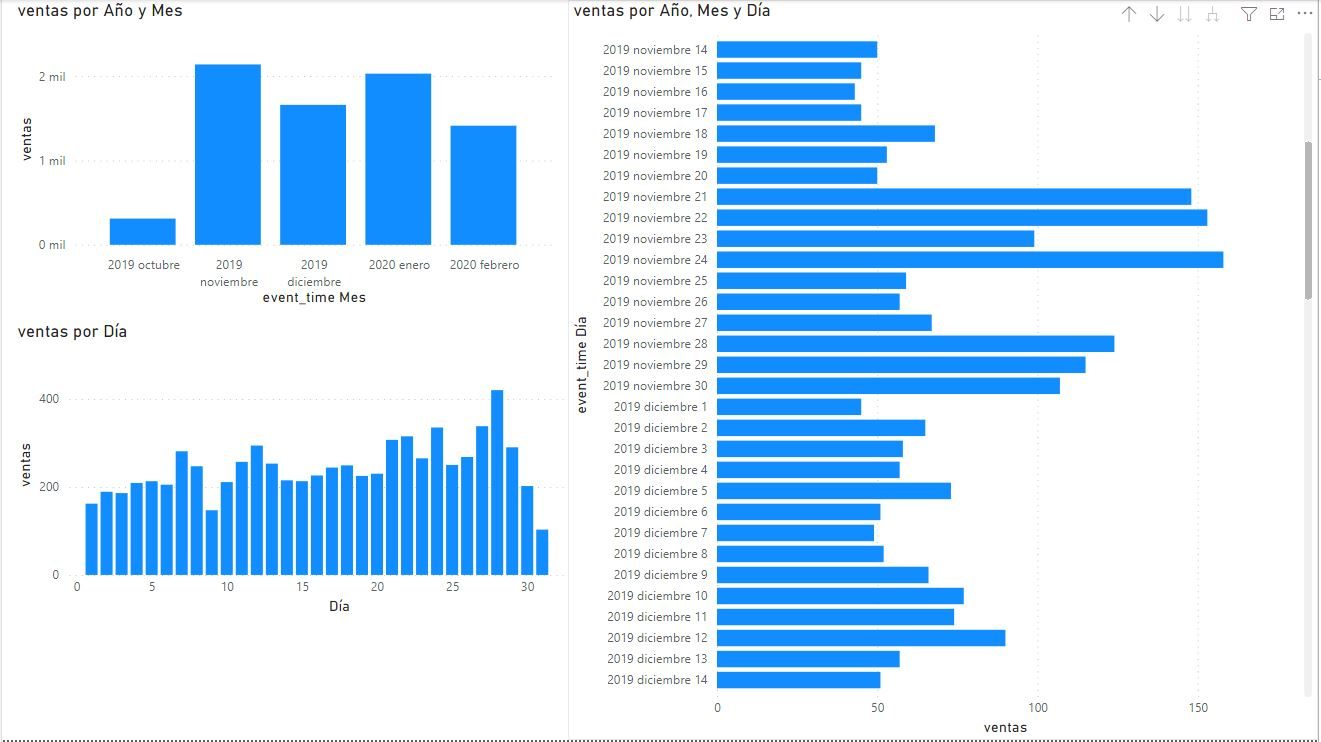

In [33]:
from IPython.display import Image
Image("C:/Users/USUARIO/Desktop/CursoML/Data/TiendaCosme/Ventas/DiagramaVentaprod5809910.jpg")